# Question 2
This notebook is a toy to mess around with nullclines in a 2D model

Import required libraries

In [1]:
import numpy as np
from scipy.integrate import solve_ivp  # Used to numerically solve the ODE
import matplotlib.pyplot as plt

In [2]:
from matplotlib.patches import Rectangle

Define the function (right hand side of the eqution).

In [3]:
x_ini = np.array([1., 1.])

def system(t=0, x=x_ini):
    x_1, x_2 = x
    x_dot = np.empty_like(x)
    x_dot[0] = x_1 * (4 - x_1 - x_2)
    x_dot[1] = x_2 * (x_1 - 2)
    return x_dot

In [4]:
def system_jac(x=x_ini):
    x_1, x_2 = x
    jac = np.empty((2, 2))
    jac[0, 0] = (4 - 2 * x_1 - x_2)
    jac[0, 1] = - x_1
    
    jac[1, 0] = x_2
    jac[1, 1] = x_1 - 2
    
    return jac

We define the zeros of the function above (found analytically but you could also do this numerically).

In [5]:
def equilibria():
    # returned as a list of points (x_1, x_2)
    eq = [
        [0, 0],
        [4, 0],
        [2, 2],   
    ]
    return np.array(eq)

Determine their local stability using the jacobian

In [6]:
def stability_marker(eq=None, jac=system_jac):
    if eq is None:
        eq = equilibria()
    stab = list()
    for e in eq:
        j_eq = system_jac(e)
        eig_vals = np.linalg.eigvals(j_eq)
        if isinstance(eig_vals[0], float):
            if np.sum(eig_vals < 0) == 2:
                stab.append('o')
            else:
                stab.append('x')
        else:
            stab.append("+")
    return stab

In [7]:
# funciton for plotting the phase space of a given system
def plot_phase_portrait(sys, sys_jac, eq, x_bounds=[-2, 2], y_bounds=[-2, 2]):
    
    x = np.linspace(x_bounds[0], x_bounds[1], 100)
    y = np.linspace(y_bounds[0], y_bounds[1], 100)
    X, Y = np.meshgrid(x, y)
    U, V = sys(t=0, x=[X, Y])
    
    
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    axs.streamplot(X, Y, U, V, density=[0.7, 1])
    
    marker = stability_marker(eq)

    for e, m in zip(eq, marker):
        axs.plot(e[0], e[1], m, c='red', ms=20)
        
    axs.set_xlim(x_bounds[0], x_bounds[1])
    axs.set_ylim(y_bounds[0], y_bounds[1])
    return axs
        

In [8]:
def plot_eigan_direction(vecs, eq, x_bounds):
    v1, v2 = vecs[:, 0], vecs[:, 1]
    lines = list()
    
    x = np.linspace(x_bounds[0], x_bounds[1], 10)
    
    for v in [v1, v2]:
        if v[0] != 0:
            m = v[1] / v[0]
            c = eq[1] - m * eq[0]
            lines.append([x, m * x + c])
    
        else:
            lines.append([np.ones_like(x) * eq[0], x])
    return lines

## Plot of the phase space

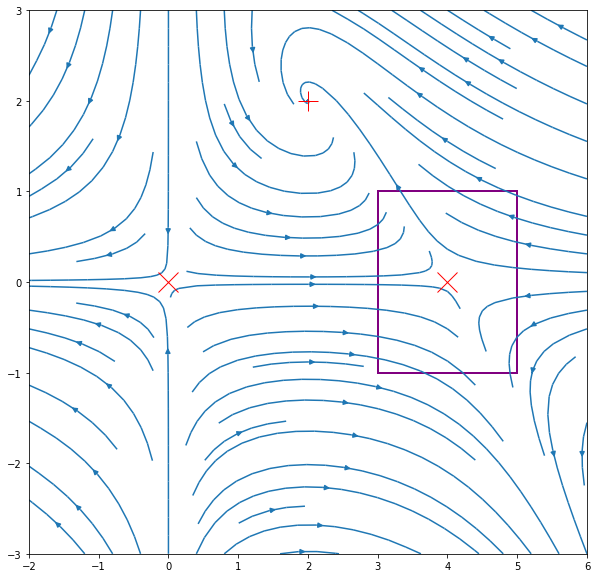

In [9]:
ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[-2, 6], y_bounds=[-3, 3])
# Create a Rectangle patch
rect = Rectangle((3, -1), 2, 2, linewidth=2, edgecolor='purple', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

We will focus on the saddle point at $(x,y)=(4, 0)$

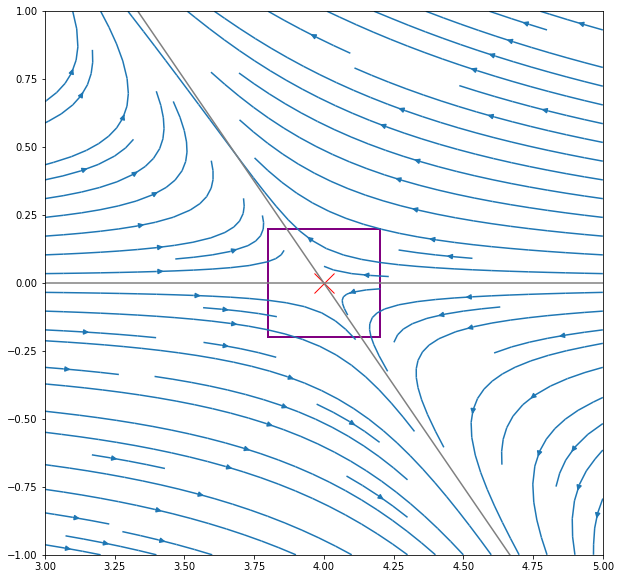

In [10]:
# calculate eigan vectors at this point:
jac = system_jac([4, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [4, 0], x_bounds=[3, 5])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[3, 5], y_bounds=[-1, 1])

# Create a Rectangle patch
rect = Rectangle((3.8, -0.2), 0.4, 0.4, linewidth=2, edgecolor='purple', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')

Zooming in more we can see the linear system describes the dynamics close to the equilibrium

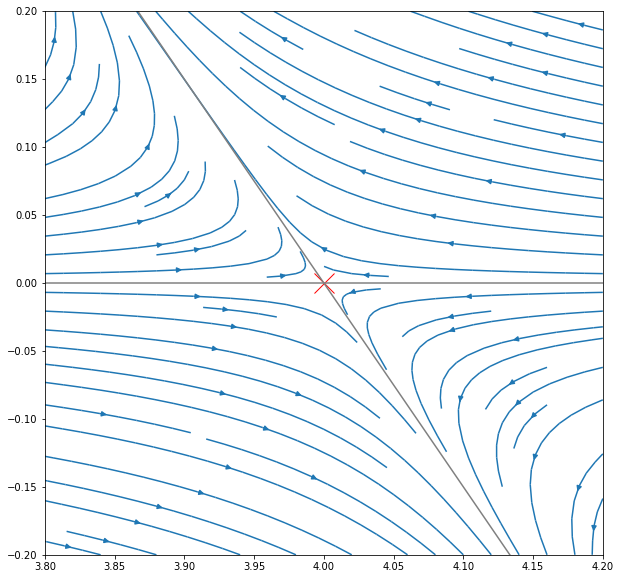

In [11]:
# calculate eigan vectors at this point:
jac = system_jac([4, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [4, 0], x_bounds=[3.8, 4.2])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[3.8, 4.2], y_bounds=[-0.2, 0.2])

for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')

We shift the system to the origin, and then do the change of variables to shift the basis:

In [12]:
def system_shifted(t=0, x=x_ini):
    u, v = x
    x_dot = np.empty_like(x)
    x_dot[0] = - (u + v) * (4 + u - 2 * v) + 2 * v * (2 + u - 2 * v)
    x_dot[1] = v * (2 + u - 2 * v)
    return x_dot

def system_shifted_jac(x=x_ini):
    u, v = x
    jac = np.empty((2, 2))
    jac[0, 0] = - (4 + u - 2 * v) - (u + v) + 2 * v * u
    jac[0, 1] = - (4 + u - 2 * v) + 2 * (u + v) + 2 * (2 + u - 2 * v) - 4 * v
    
    jac[1, 0] = v
    jac[1, 1] = (2 + u - 2 * v) - 2 * v
    
    return jac

def eq_shifted():
    eq = equilibria()
    eq[:, 0] -= 4 
    return eq

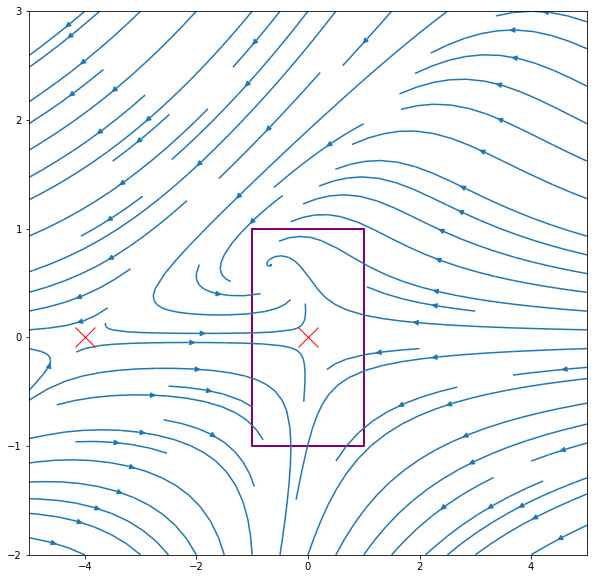

In [13]:
ax = plot_phase_portrait(system_shifted, system_shifted_jac, eq_shifted()[:-1], x_bounds=[-5, 5], y_bounds=[-2, 3])
# Create a Rectangle patch
rect = Rectangle((-1, -1), 2, 2, linewidth=2, edgecolor='purple', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

Zooming into the new saddle point at $(x,y)=(0, 0)$

In [14]:
# Define the stable and unstable curves
def w_unstable_shifted(y):
    return -1/4 * y**2 - 7/40 * y**3

y = np.linspace(-1, 1, 100)

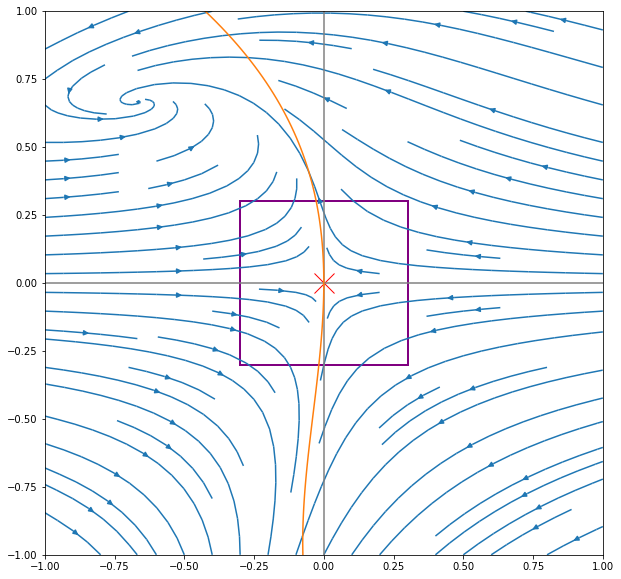

In [15]:
jac = system_shifted_jac([0, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [0, 0], x_bounds=[-1, 1])

ax = plot_phase_portrait(system_shifted, system_shifted_jac, eq_shifted()[:-1], x_bounds=[-1, 1], y_bounds=[-1, 1])

# Create a Rectangle patch
rect = Rectangle((-0.3, -0.3), 0.6, 0.6, linewidth=2, edgecolor='purple', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')
    
ax.plot(w_unstable_shifted(y), y)

Zoomed in version:

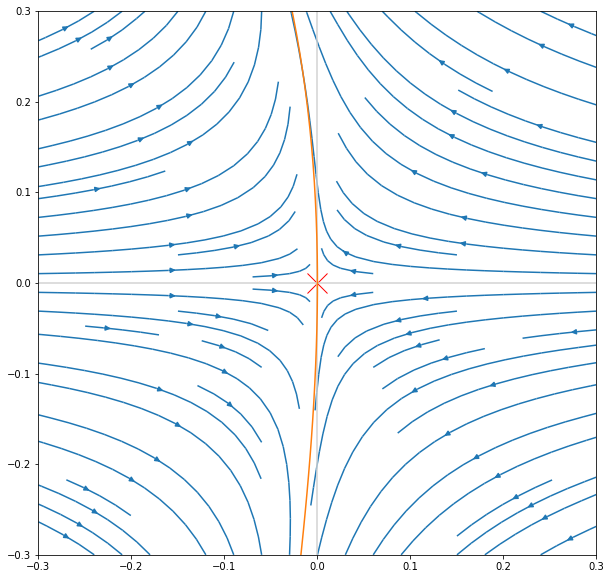

In [16]:
jac = system_shifted_jac([0, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [0, 0], x_bounds=[-0.3, 0.3])

ax = plot_phase_portrait(system_shifted, system_shifted_jac, eq_shifted()[:-1], x_bounds=[-0.3, 0.3], y_bounds=[-0.3, 0.3])

for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='lightgrey')
    
ax.plot(w_unstable_shifted(y), y)

### Reshift the system

In [17]:
# Define the stable and unstable curves
def w_unstable(y):
    return 4 - 2/3 * y - 1/36 * y**2 - 7/1080 * y**3

y = np.linspace(-1, 4, 100)

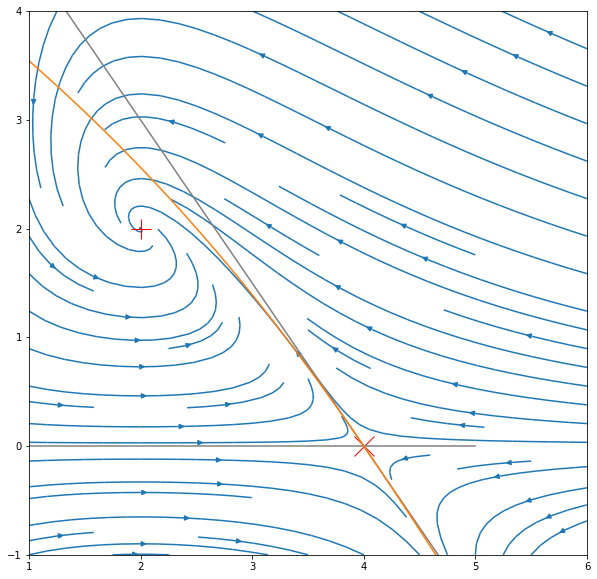

In [18]:
# calculate eigan vectors at this point:
jac = system_jac([4, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [4, 0], x_bounds=[1, 5])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[1, 6], y_bounds=[-1, 4])

for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey')
    
ax.plot(w_unstable(y), y)

# Generating unstable to many orders of magnitude

In [19]:
import sympy as sy

In [20]:
w = sy.Symbol('w')
v = sy.Symbol('v')
w_prime = sy.Symbol('w_prime')

In [21]:
order = 100

# Generate coeficients
coefs = list()
unstable = 0
for i in range(2, order+2):
    s = sy.Symbol('w'+str(i))
    coefs.append(s)
    unstable += s * v ** i
    
unstable_d = sy.diff(unstable, v)

In [22]:
%%time
eq1 = -4 * w + (w - 2*v) * (v - w)
eq2 = w_prime * (2 * v + v * (w - 2 * v))

eq_comb_1 = eq1.subs(w, unstable)
eq_comb_1 = eq_comb_1.subs(w_prime, unstable_d).expand().as_coeff_exponent(v)

eq_comb_2 = eq2.subs(w, unstable)
eq_comb_2 = eq_comb_2.subs(w_prime, unstable_d).expand().as_coeff_exponent(v)

CPU times: user 6.88 s, sys: 18.8 ms, total: 6.9 s
Wall time: 6.89 s


In [23]:
%%time
num_coefs = list()
w_v = 0

for i in range(order):
    coef1 = eq_comb_1[0].coeff(v**(i+2))
    coef2 = eq_comb_2[0].coeff(v**(i+2))
    eq_coef = sy.Equality(coef1, coef2)
    
    for j in range(i):
        eq_coef = eq_coef.subs(coefs[j], num_coefs[j])
    coef_ = sy.solve(eq_coef)[0]
    num_coefs.append(coef_)
    
    w_v += coef_ * v**(i+2) 

CPU times: user 1min 54s, sys: 24.4 ms, total: 1min 55s
Wall time: 1min 55s


### Shift equation to original basis

In [24]:
y_sym = sy.Symbol('y')
x_t = w_v.subs(v, y_sym/3) - 2/3 * y_sym + 4

In [25]:
x_t

-72665497152864953325721221861977674690367623777275884686812288325667770881938007161026459274633294015755326989641318771513711608491213252004437687686433296217292543431595640617680632236636777904844195426170413860919929973928172606202753495022466927093*y**101/19668878727000169288690911661600998253506333924541154442146231147007722813799132075671857583498536169915738000527531588863718603062273406127131467798694531331628053218762816925263268179755581618109747358616280963753295906676700235995821585203200000000000000000000000000000000000000000000000 - 1250439237894654643355712728918985252931997858163533990287380173133272085635800887552963864312147258930520289534320251728047189605792958967640915015340683946813559577697110980466642390715355414236582704862460186368464591165641740962323816907773564359*y**100/150621963584850117474746306409042503500267644533564346823721762699508053947188545400568030056897712953529488784437370891326229746242948080947667883780663993054594116280900277184494116564711

In [26]:
f = sy.lambdify(y_sym, x_t)

## Plot phase space 

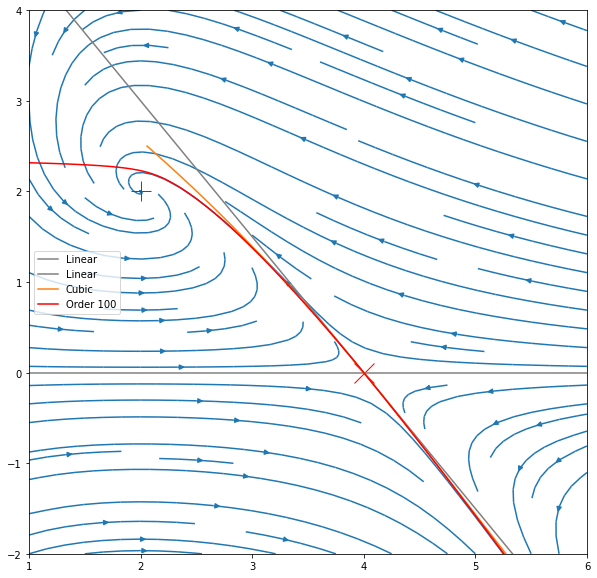

In [28]:
# calculate eigan vectors at this point:
y = np.linspace(-2, 2.5, 1000)

jac = system_jac([4, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [4, 0], x_bounds=[1, 6])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[1, 6], y_bounds=[-2, 4])

for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey', label='Linear')
    
ax.plot(w_unstable(y), y, label='Cubic')
ax.plot(f(y), y, c='red', label='Order ' + str(order))
ax.legend()

The true unstable manifold is the hetroclinic trajectory that links the saddle point, and the focus at (2, 0), as shown below. We find this numerically, by just placing an initial condition very close to the saddle point, on the manifold of order 100

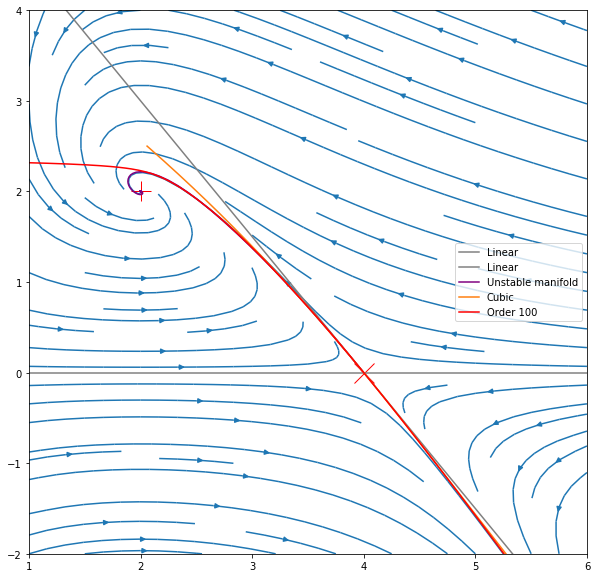

In [62]:
# calculate eigan vectors at this point:
y = np.linspace(-2, 2.5, 1000)

jac = system_jac([4, 0])
vals, vecs = np.linalg.eig(jac)

eigan_directions = plot_eigan_direction(vecs, [4, 0], x_bounds=[1, 6])

ax = plot_phase_portrait(system, system_jac, equilibria(), x_bounds=[1, 6], y_bounds=[-2, 4])

for ev in eigan_directions:
    ax.plot(ev[0], ev[1], c='grey', label='Linear')
    
# Neively find the unstable manifold by following a trajectory on it
ic_y = y[y>0][np.argmin(y[y > 0])]
ic_x = w_unstable(ic_y)

unstable_manifold_sol = solve_ivp(system, (0, 100), [ic_x, ic_y], t_eval=np.linspace(0, 100, 1000))
  
ax.plot(unstable_manifold_sol.y[0], unstable_manifold_sol.y[1], c='purple', label='Unstable manifold')    
ax.plot(w_unstable(y), y, label='Cubic')
ax.plot(f(y), y, c='red', label='Order ' + str(order))
ax.legend()